In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from scipy.optimize import fsolve
from random import random


In [2]:
pp = sp.symbols('pp') # permit price
q1, q2 = sp.symbols('q1 q2') # quantity of firm1 and firm2
x1, x2 = sp.symbols('x1 x2') # emission of firm1 and firm2
cap = 100
a = 1
profit1 = (100 - 0.1 * (q1 + q2)) * q1 - 2*(q1 - x1)**3 - pp*(x1-0*(q1-x1))
profit2 = (100 - 0.1 * (q1 + q2)) * q2 - 0.5*(q2 - x2)**2 - pp*(x2 - 0*(q2-x2))
# First order conditions
foc1 = sp.diff(profit1, q1)
foc2 = sp.diff(profit2, q2)
foc3 = sp.diff(profit1, x1)
foc4 = sp.diff(profit2, x2)

# print("First order conditions Q, firm 1: ", foc1)
# print("First order conditions X, firm 2: ", foc2)
# print("First order conditions Q, firm 1: ", foc3)
# print("First order conditions X, firm 2: ", foc4)

# Solve for q1, q2, x1, x2
solutions = sp.nsolve([foc1, foc2, foc3, foc4, x1 + x2 - cap], (q1, q2, x1, x2, pp), (1, 1, 1, 1, 1))

print("q1: ", solutions[0], "x1: ", solutions[2], "abatement: ", solutions[2] - solutions[0])
print("q2: ", solutions[1], "x2: ", solutions[3], "abatement: ", solutions[3] - solutions[1])
print("pp: ", solutions[4])


q1:  88.4778121115385 x1:  84.9788442549999 abatement:  -3.49896785653851
q2:  88.4778121115385 x2:  15.0211557450001 abatement:  -73.4566563665385
pp:  73.4566563665385


In [27]:
pp = sp.symbols('pp') # permit price
q1, q2 = sp.symbols('q1 q2') # quantity of firm1 and firm2
x1, x2 = sp.symbols('x1 x2') # emission of firm1 and firm2
cap = 50
a = 0
profit1 = (10 - 0.1 * (q1 + q2)) * q1 - 2*(q1 - x1)**2 - pp*(x1-a*q1)
profit2 = (10 - 0.1 * (q1 + q2)) * q2 - 100*(q2 - x2)**2 - pp*x2

abatement1 = 2*(q1 - x1)**2
abatement2 = 100*(q2 - x2)**2
permit1 = x1 - a*q1
permit2 = x2
trade1 = pp*(x1 - a*q1)
trade2 = pp*x2
revenew1 = (10 - 0.1 * (q1 + q2)) * q1
revenew2 = (10 - 0.1 * (q1 + q2)) * q2
frees = np.linspace(0, 1, 100)
cap = 50

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
permits1 = []
permits2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []


for free in tqdm.tqdm(frees):
    
    
    profit1 = (10 - 0.1 * (q1 + q2)) * q1 - 2*(q1 - x1)**2 - pp*(x1-free*q1)
    profit2 = (10 - 0.1 * (q1 + q2)) * q2 - 0.5*(q2 - x2)**2 - pp*x2
    # First order conditions
    foc1 = sp.diff(profit1, q1)
    foc2 = sp.diff(profit2, q2)
    foc3 = sp.diff(profit1, x1)
    foc4 = sp.diff(profit2, x2)

    # Solve for q1, q2, x1, x2
    solutions = sp.solve([foc1, foc2, foc3, foc4, x1 + x2 - cap], (q1, q2, x1, x2, pp))

    abatement1 = 2*(q1 - x1)**2
    abatement2 = 0.5*(q2 - x2)**2
    permit1 = x1 - a*q1
    permit2 = x2
    trade1 = pp*(x1 - a*q1)
    trade2 = pp*x2
    revenew1 = (10 - 0.1 * (q1 + q2)) * q1
    revenew2 = (10 - 0.1 * (q1 + q2)) * q2

    profits1.append(profit1.subs(solutions))
    profits2.append(profit2.subs(solutions))
    abatements1.append(abatement1.subs(solutions))
    abatements2.append(abatement2.subs(solutions))
    permits1.append(permit1.subs(solutions))
    permits2.append(permit2.subs(solutions))
    trade1 = pp*(x1 - free*q1)
    trades1.append(trade1.subs(solutions))
    trades2.append(trade2.subs(solutions))
    revenews1.append(revenew1.subs(solutions))
    revenews2.append(revenew2.subs(solutions))
    permit_price.append(solutions[pp])
    outputs1.append(solutions[q1])
    outputs2.append(solutions[q2])
    emissions1.append(solutions[x1])
    emissions2.append(solutions[x2])
    

    

100%|██████████| 100/100 [00:03<00:00, 28.45it/s]


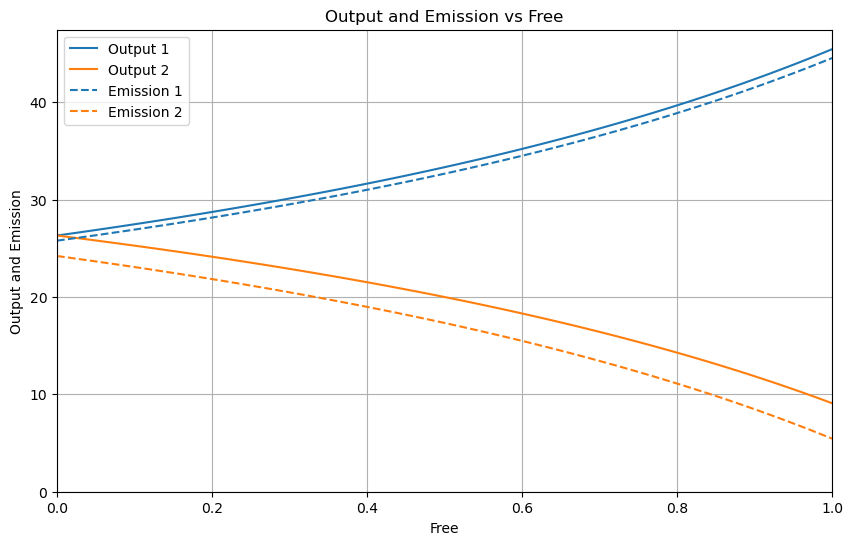

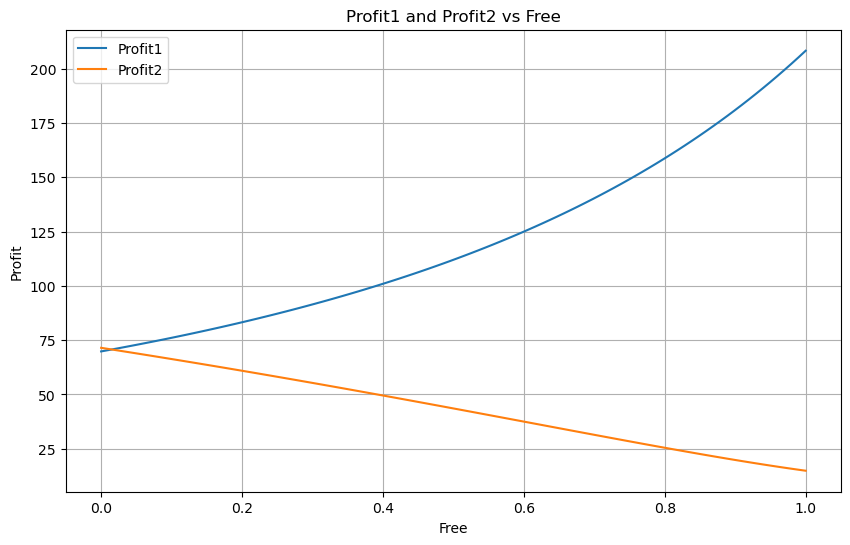

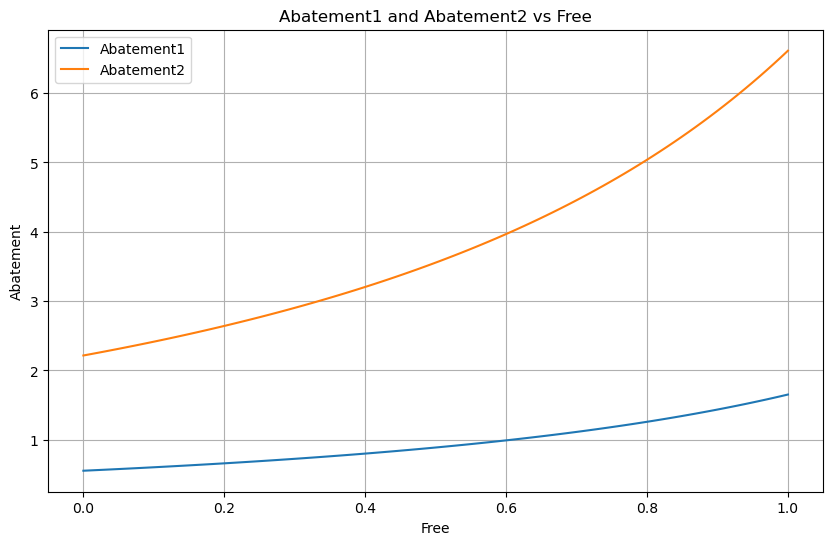

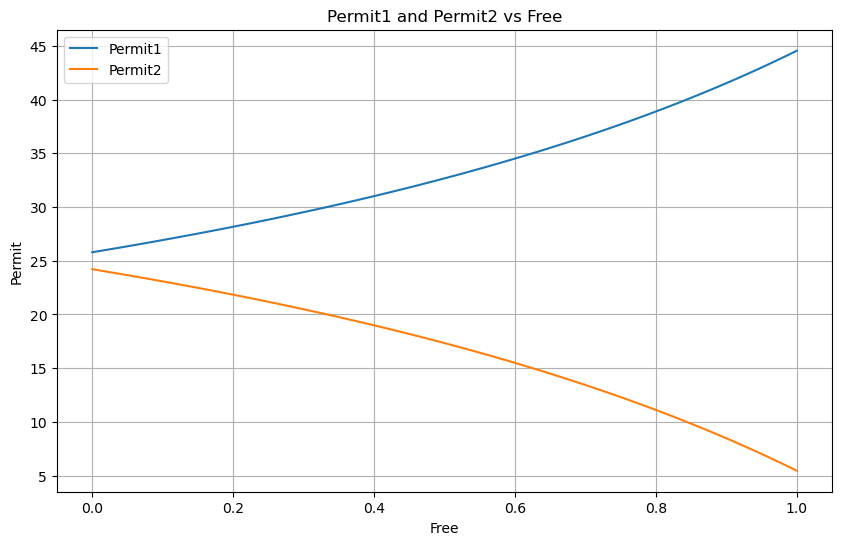

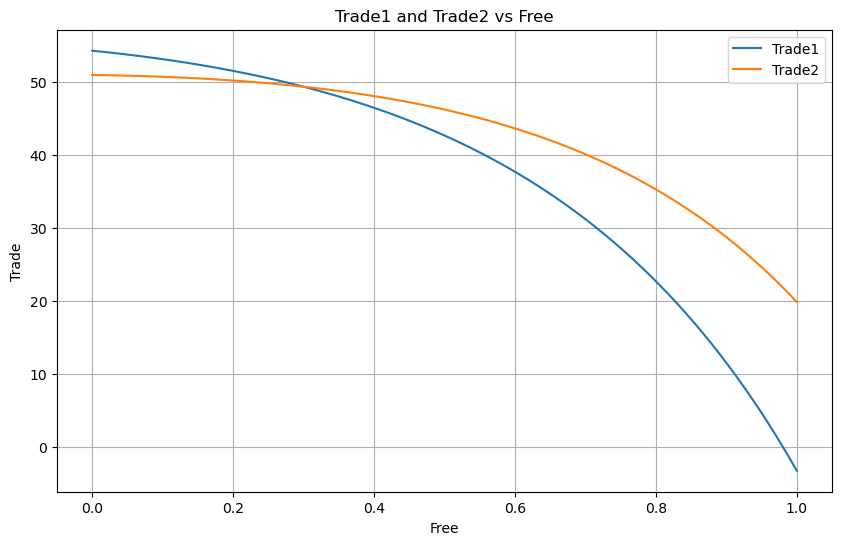

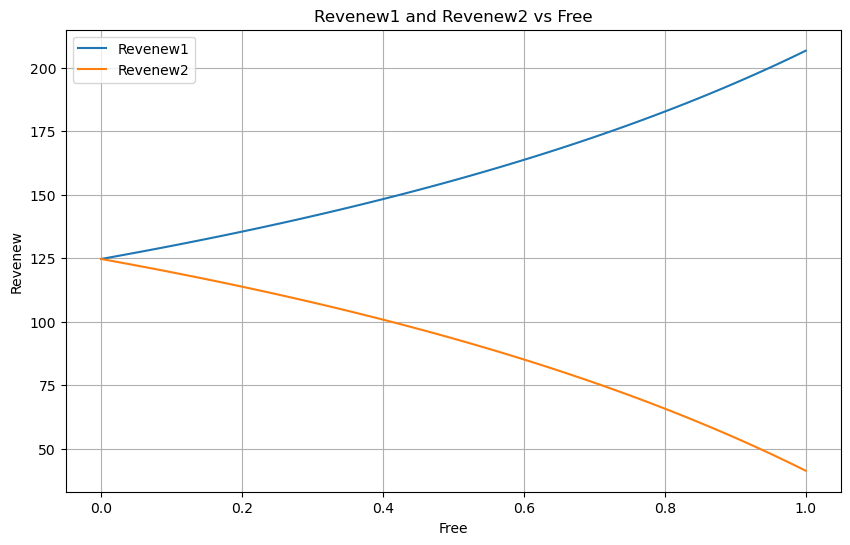

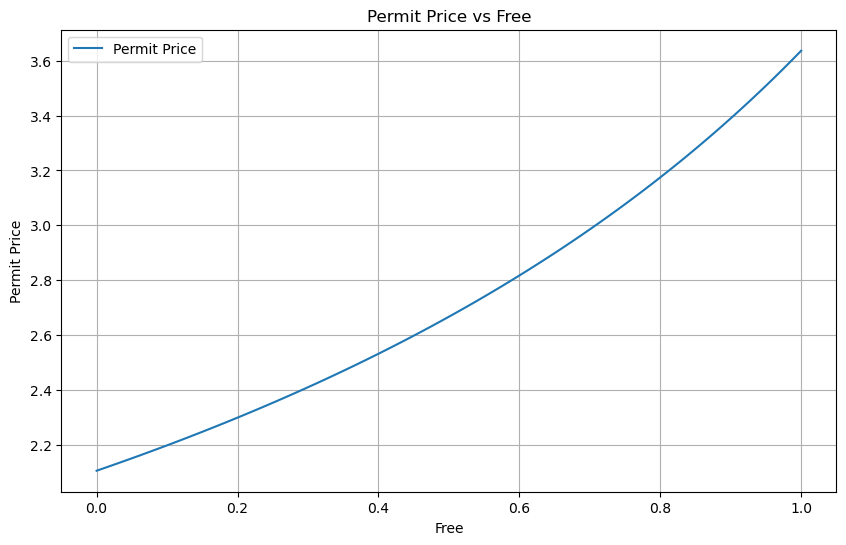

In [28]:
# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profit1 and Profit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatement1 and Abatement2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits1, label='Permit1')
plt.plot(frees, permits2, label='Permit2')
plt.xlabel('Free')
plt.ylabel('Permit')
plt.title('Permit1 and Permit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Trade1 and Trade2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Revenew1 and Revenew2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()